# GARCH Stock Forecasting

## Read Data

In [1]:
# import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [2]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [9]:
tickerData = yf.Ticker("DIS")
tickerDf = tickerData.history(interval='1d', start='2015-1-1', end='2020-4-10')
# dis = web.DataReader('DIS', 'yahoo', start=start, end=end)

In [6]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,105.491642,106.506549,105.130575,106.340652,9723500,0.0,0.0
2019-01-03 00:00:00-05:00,105.862467,106.028363,103.383754,103.764343,10594700,0.0,0.0
2019-01-04 00:00:00-05:00,105.335492,108.077687,104.662139,106.965195,10122800,0.0,0.0
2019-01-07 00:00:00-05:00,107.257963,108.712008,106.662681,107.892273,6714700,0.0,0.0
2019-01-08 00:00:00-05:00,109.102357,109.844014,108.487554,108.731522,8730700,0.0,0.0
...,...,...,...,...,...,...,...
2020-04-03 00:00:00-04:00,95.134738,95.737294,91.578669,92.734390,14814600,0.0,0.0
2020-04-06 00:00:00-04:00,96.073156,98.967402,93.366586,98.364845,20407400,0.0,0.0
2020-04-07 00:00:00-04:00,103.580398,104.597828,99.026653,100.004570,22899600,0.0,0.0


In [10]:
returns = 100 * tickerDf.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

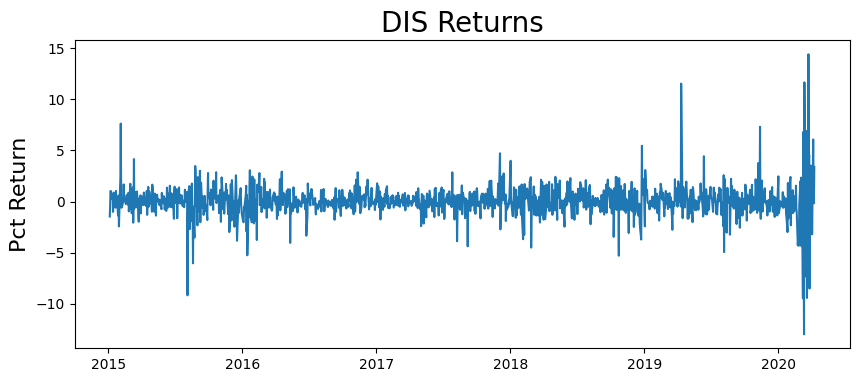

In [11]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

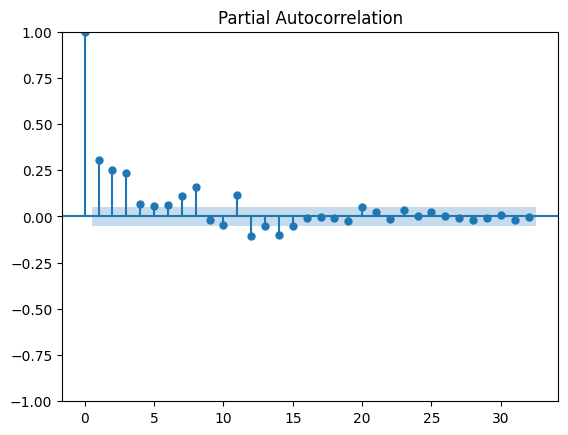

In [12]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [13]:
model = arch_model(returns, p=3, q=3)

In [14]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 92650542510.72173
Iteration:      2,   Func. Count:     22,   Neg. LLF: 1073335057.9596208
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2567.6155481685914
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2731.745682259
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2225.3651009147743
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2216.8456270647057
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2204.864338341422
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2204.9341675714463
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2277.241931764767
Iteration:     10,   Func. Count:    103,   Neg. LLF: 2190.0389264722553
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2189.9773278799535
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2190.049183490915
Iteration:     13,   Func. Count:    131,   Neg. LLF: 2189.932410496764
Iteration:     14,   Func. Count:    140,   Neg. LLF: 2189.9

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2189.91
Distribution:                  Normal   AIC:                           4395.82
Method:            Maximum Likelihood   BIC:                           4437.34
                                        No. Observations:                 1326
Date:                Tue, May 20 2025   Df Residuals:                     1325
Time:                        22:34:34   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -8.3066e-04  4.025e-02 -2.064e-02      0.984 [-7.972e-02,7.806e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.6422      0.193      3.326  8.804e-04    [  0.264,  1.021]
alpha[1]       0.0757  4.226e-02      1.792  7.310e-02 [-7.090e-03,  0.159]
alpha[2]       0.1786  9.939e-02      1.798  7.225e-02 [-1.614e-02,  0.373]
alpha[3]       0.3449      0.162      2.126  3.348e-02  [2.698e-02,  0.663]
beta[1]    1.1650e-14  9.498e-02  1.227e-13      1.000    [ -0.186,  0.186]
beta[2]        0.0000      0.141      0.000      1.000    [ -0.276,  0.276]
beta[3]        0.1507      0.147      1.025      0.306    [ -0.138,  0.439]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [16]:
model = arch_model(returns, p=3, q=0)

In [17]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3867.2516031179184
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4473.501719872253
Iteration:      3,   Func. Count:     24,   Neg. LLF: 14606.161169213843
Iteration:      4,   Func. Count:     31,   Neg. LLF: 804452.5688010113
Iteration:      5,   Func. Count:     38,   Neg. LLF: 7742.183469133184
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2340.863435539174
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2411.422539744102
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2198.273680506039
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2194.6241728784307
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2194.5317583070405
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2194.51919779239
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2194.518216338082
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2194.5181754169125
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2194.5

In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2194.52
Distribution:                  Normal   AIC:                           4399.04
Method:            Maximum Likelihood   BIC:                           4424.99
                                        No. Observations:                 1326
Date:                Tue, May 20 2025   Df Residuals:                     1325
Time:                        22:35:21   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.1597e-03  3.972e-02      0.231      0.818 [-6.868e-02,8.700e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8240      0.138      5.951  2.669e-09   [  0.553,  1.095]
alpha[1]       0.1008  5.058e-02      1.993  4.630e-02 [1.653e-03,  0.200]
alpha[2]       0.2112      0.102      2.063  3.914e-02 [1.052e-02,  0.412]
alpha[3]       0.3758      0.174      2.166  3.034e-02 [3.569e-02,  0.716]
==========================================================================

Covariance estimator: robust
"""

In [19]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [20]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

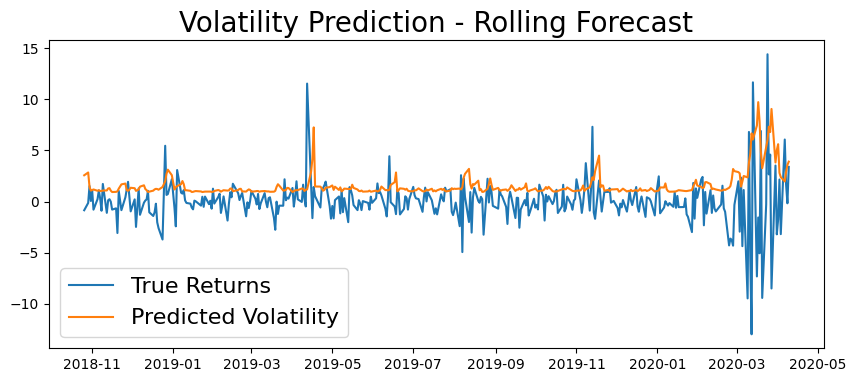

In [21]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [ ]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [22]:
tickerData = yf.Ticker("SPY")
tickerDf = tickerData.history(interval='1d', start='2000-1-1', end='2020-4-10')


# spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [23]:
returns = 100 * tickerDf.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

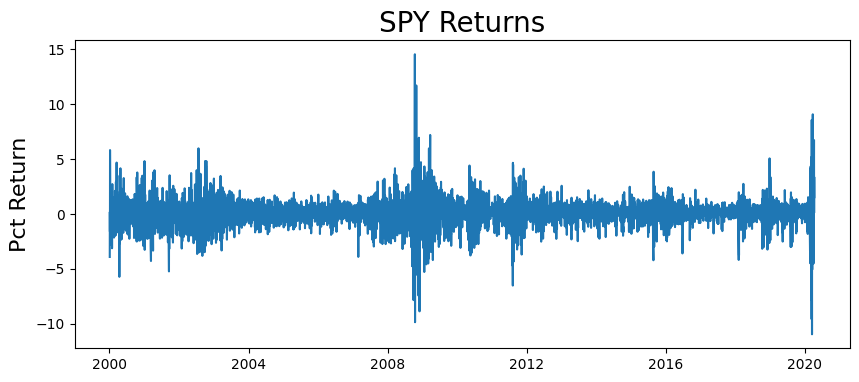

In [24]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

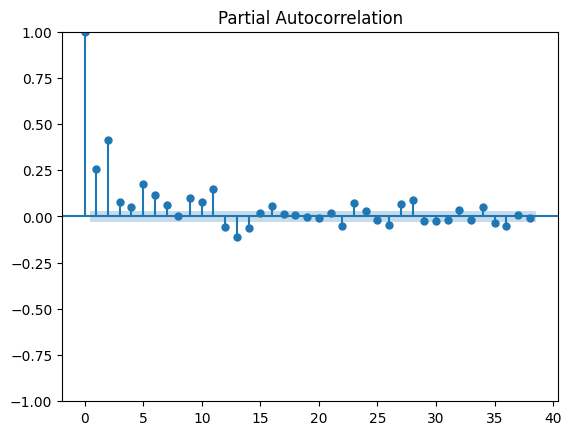

In [25]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [26]:
model = arch_model(returns, p=2, q=2)

In [27]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 103414.05457936639
Iteration:      2,   Func. Count:     21,   Neg. LLF: 59892.10111222805
Iteration:      3,   Func. Count:     33,   Neg. LLF: 11404.15053476845
Iteration:      4,   Func. Count:     42,   Neg. LLF: 9391.225617806214
Iteration:      5,   Func. Count:     51,   Neg. LLF: 7126.674270017984
Iteration:      6,   Func. Count:     59,   Neg. LLF: 6964.420433781224
Iteration:      7,   Func. Count:     67,   Neg. LLF: 6962.570359536403
Iteration:      8,   Func. Count:     75,   Neg. LLF: 6980.597035033925
Iteration:      9,   Func. Count:     83,   Neg. LLF: 6956.747386881212
Iteration:     10,   Func. Count:     90,   Neg. LLF: 6956.738790460216
Iteration:     11,   Func. Count:     97,   Neg. LLF: 6956.737603591209
Iteration:     12,   Func. Count:    104,   Neg. LLF: 6956.737579802337
Iteration:     13,   Func. Count:    110,   Neg. LLF: 6956.73757980191
Optimization terminated successfully    (Exit mode 0)
          

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6956.74
Distribution:                  Normal   AIC:                           13925.5
Method:            Maximum Likelihood   BIC:                           13964.7
                                        No. Observations:                 5099
Date:                Tue, May 20 2025   Df Residuals:                     5098
Time:                        22:40:29   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0732  1.096e-02      6.675  2.468e-11 [5.170e-02,9.468e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0408  9.964e-03      4.095  4.226e-05 [2.127e-02,6.033e-02]
alpha[1]       0.0861  2.341e-02      3.680  2.336e-04   [4.026e-02,  0.132]
alpha[2]       0.1351  2.756e-02      4.903  9.442e-07   [8.109e-02,  0.189]
beta[1]        0.2352      0.290      0.811      0.417     [ -0.333,  0.803]
beta[2]        0.5152      0.257      2.004  4.502e-02   [1.143e-02,  1.019]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [29]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [30]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

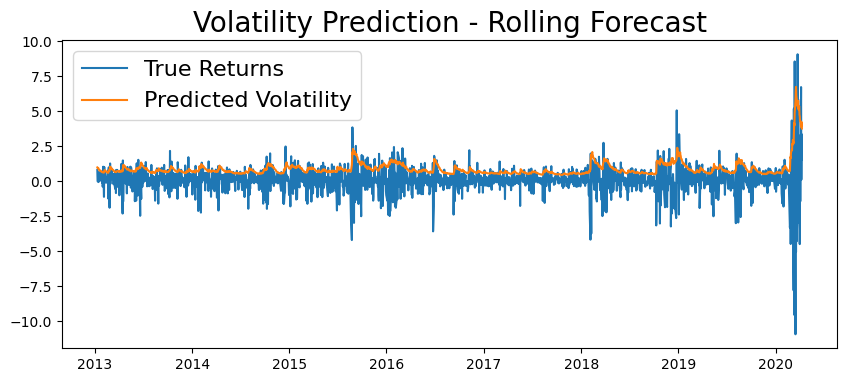

In [31]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [32]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [33]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

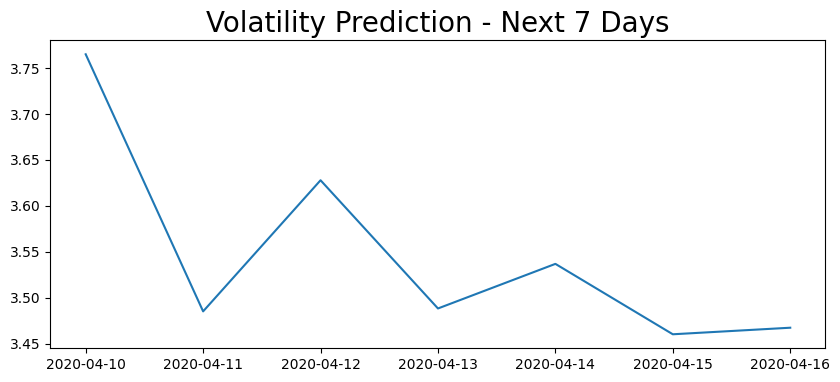

In [34]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)